In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from statsmodels.api import add_constant

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import os
os.getcwd()

'C:\\Users\\SarShel\\DEC\\CodeSprints\\Regression\\ASPRS\\FingerLakes'

In [3]:
os.chdir('C:\\Users\\SarShel\\DEC\\Regression')
os.getcwd()

'C:\\Users\\SarShel\\DEC\\Regression'

In [4]:
# Read Field dataset 
Data0 = pd.read_csv('data_raw/Indices/FingerLakes.csv')

# Remove none values
Data = Data0.dropna()

# Display the first few rows of our DataFrame
#FieldData.head()
print(Data)

     Unnamed: 0  Year  Month  Day      2BDA      3BDA      NDCI        B1  \
0           200  2017      7    3  0.912575 -0.084196 -0.049463  0.160814   
1           201  2017      7    3  0.919797 -0.077209 -0.041808  0.180428   
2           282  2017      8   19  0.865965 -0.134743 -0.071927  0.158669   
3           388  2018      7    3  0.876471 -0.133994 -0.066039  0.107397   
4           389  2018      7    5  0.806616  0.016263  0.006623  0.230924   
..          ...   ...    ...  ...       ...       ...       ...       ...   
112        1450  2020      9   20  0.940167 -0.059841 -0.034770  0.117000   
113        1451  2020      9   20  0.937430 -0.060636 -0.035975  0.117417   
114        1455  2020      9   20  0.860895 -0.138232 -0.074871  0.107421   
115        1456  2020      9   20  0.865806 -0.129911 -0.072058  0.110141   
116        1483  2020      9   27  0.985506 -0.017302 -0.007349  0.160810   

          B10       B11  ...        B6        B7        B8       B8A  \
0  

In [5]:
# Descriptive statistics of all variables
list = ['2BDA', 'NDCI', 'Chl-a']

# get the summary
desc_data = Data [list].describe()

# add the standard deviation metric
desc_data.loc['+3_std'] = desc_data.loc['mean'] + (desc_data.loc['std'] * 3)
desc_data.loc['-3_std'] = desc_data.loc['mean'] - (desc_data.loc['std'] * 3)

# display it
desc_data

,2BDA,NDCI,Chl-a
count,117.000000,117.000000,117.000000
mean,0.926077,-0.039133,5.229865
std,0.069430,0.036356,4.332009
min,0.796202,-0.113502,0.229200
25%,0.874731,-0.066979,2.290000
50%,0.910392,-0.046959,3.962000
75%,0.964004,-0.018529,7.060000
max,1.082229,0.037450,24.760000
+3_std,1.134367,0.069934,18.225893
-3_std,0.717788,-0.148200,-7.766163


In [6]:
# Pearson Coefficient 
corr = Data[list].corr(method='pearson')

# display the correlation matrix
display(corr)

,2BDA,NDCI,Chl-a
2BDA,1.000000,0.960599,0.130727
NDCI,0.960599,1.000000,0.144573
Chl-a,0.130727,0.144573,1.000000


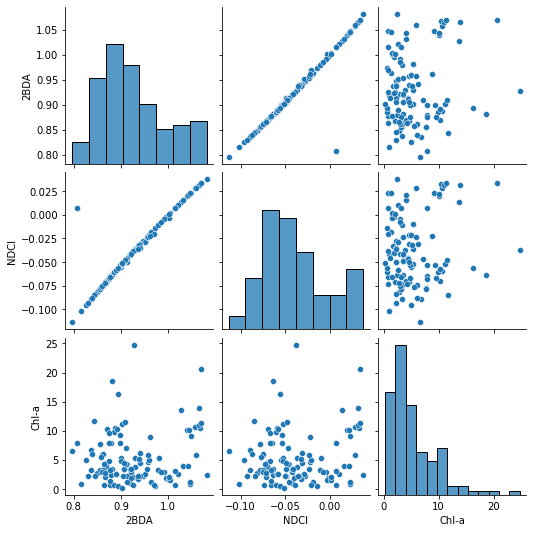

In [7]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data[list])

In [8]:
# Getting column names
X_columns = ["2BDA", "NDCI"]
Y = Data["Chl-a"]

In [9]:
#Calculate VIFs on our dataset
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Data[X_columns[0:3]].values, i) for i in range(Data[X_columns[0:3]].shape[1])]
vif["features"] = Data[X_columns[0:3]].columns

# display VIF
vif.round()

,VIF Factor,features
0,2.0,2BDA
1,2.0,NDCI


In [10]:
# Extract independent variables (X) & dependent variable (Y)
X = Data[X_columns]
X=add_constant(X)
Y = Data['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.4265
Date:                Wed, 02 Mar 2022   Prob (F-statistic):              0.654
Time:                        15:51:14   Log-Likelihood:                -227.85
No. Observations:                  81   AIC:                             461.7
Df Residuals:                      78   BIC:                             468.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.2998     19.895      1.020      0.3

In [11]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)


predicted Y: 69     5.195126
46     4.886307
58     4.319868
114    5.238463
73     5.128809
98     4.781619
31     5.339335
53     5.019255
65     4.989219
96     5.126526
95     4.346545
97     5.237283
2      5.222889
62     5.213719
110    4.464016
55     5.111988
103    5.098699
100    5.305333
66     4.587209
44     5.158188
77     5.331699
17     4.862564
81     5.187359
74     5.058599
56     5.140495
94     5.368155
35     4.320405
38     4.520702
93     5.232058
48     5.085244
33     4.547539
59     4.340491
92     5.024475
42     5.035695
10     5.312842
85     5.005328
dtype: float64


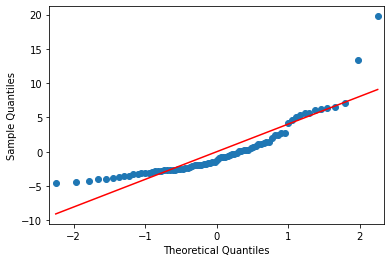

The mean of the residuals is -1.473e-14


In [12]:
import pylab

# check for the normality of the residuals
sm.qqplot(result.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(result.resid)/ len(result.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [13]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 25.4
MAE 3.72
RMSE 5.04


In [15]:
# MergedData: Threshold  Chl-a < 2
Data1 = Data.loc[(Data["Chl-a"] > 2)]
Data1.shape

(96, 25)

In [17]:
# get the summary
desc_data1 = Data1 [list].describe()

# add the standard deviation metric
desc_data1.loc['+3_std'] = desc_data1.loc['mean'] + (desc_data1.loc['std'] * 3)
desc_data1.loc['-3_std'] = desc_data1.loc['mean'] - (desc_data1.loc['std'] * 3)

# display it
desc_data1

,2BDA,NDCI,Chl-a
count,96.000000,96.000000,96.000000
mean,0.922930,-0.040637,6.146367
std,0.070653,0.036988,4.258724
min,0.796202,-0.113502,2.022000
25%,0.868419,-0.069905,3.175000
50%,0.905896,-0.049448,4.745000
75%,0.957728,-0.021756,7.909000
max,1.082229,0.037450,24.760000
+3_std,1.134888,0.070326,18.922538
-3_std,0.710971,-0.151601,-6.629804


In [18]:
# Pearson Coefficient 
corr1 = Data1[list].corr(method='pearson')

# display the correlation matrix
display(corr1)

,2BDA,NDCI,Chl-a
2BDA,1.000000,0.953792,0.207248
NDCI,0.953792,1.000000,0.219329
Chl-a,0.207248,0.219329,1.000000


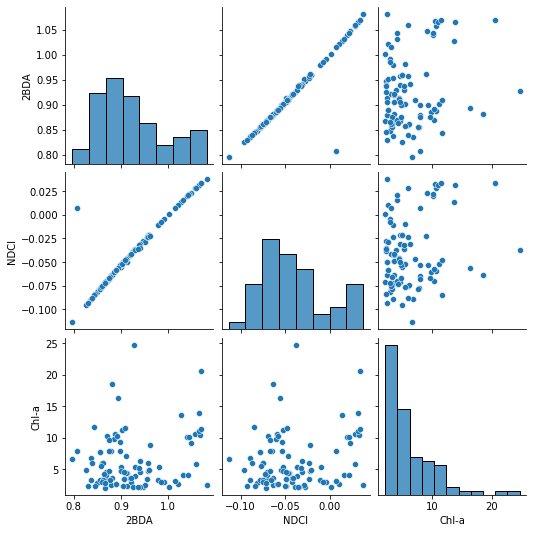

In [19]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data1[list])

In [20]:
# Extract independent variables (X) & dependent variable (Y)
X = Data1[X_columns]
X = add_constant(X)
Y = Data1['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.718
Date:                Wed, 02 Mar 2022   Prob (F-statistic):             0.0736
Time:                        15:52:05   Log-Likelihood:                -194.07
No. Observations:                  67   AIC:                             394.1
Df Residuals:                      64   BIC:                             400.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3901    197.044      0.012      0.9

In [21]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)

predicted Y: 46     6.672062
35     8.730094
52     5.832370
69     5.117817
95     8.689856
89     4.493993
76     6.186539
50     5.714565
98     6.735112
105    8.780130
72     4.856570
30     5.382188
112    6.302754
92     6.018490
36     8.236556
64     4.721098
45     5.020275
12     6.013323
4      6.706886
44     5.339135
62     4.996694
67     5.600958
21     5.568362
110    8.308433
116    7.257680
39     7.903431
37     7.128157
56     5.446210
104    8.584805
dtype: float64


In [22]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 12.8
MAE 3.22
RMSE 3.57


In [23]:
# MergedData: Threshold  Chl-a < 8
Data2 = Data.loc[(Data["Chl-a"] > 8)]
Data2.shape

(23, 25)

In [24]:
# get the summary
desc_data2 = Data2 [list].describe()

# add the standard deviation metric
desc_data2.loc['+3_std'] = desc_data2.loc['mean'] + (desc_data2.loc['std'] * 3)
desc_data2.loc['-3_std'] = desc_data2.loc['mean'] - (desc_data2.loc['std'] * 3)

# display it
desc_data2

,2BDA,NDCI,Chl-a
count,23.000000,23.000000,23.000000
mean,0.964529,-0.020131,12.324000
std,0.084977,0.043871,4.054804
min,0.843901,-0.084683,8.864000
25%,0.889503,-0.058632,10.091000
50%,0.927337,-0.037805,10.568000
75%,1.053191,0.025676,12.665000
max,1.070283,0.033933,24.760000
+3_std,1.219460,0.111481,24.488413
-3_std,0.709598,-0.151743,0.159587


In [25]:
# Pearson Coefficient 
corr2 = Data2[list].corr(method='pearson')

# display the correlation matrix
display(corr2)

,2BDA,NDCI,Chl-a
2BDA,1.000000,0.999805,-0.002778
NDCI,0.999805,1.000000,0.002390
Chl-a,-0.002778,0.002390,1.000000


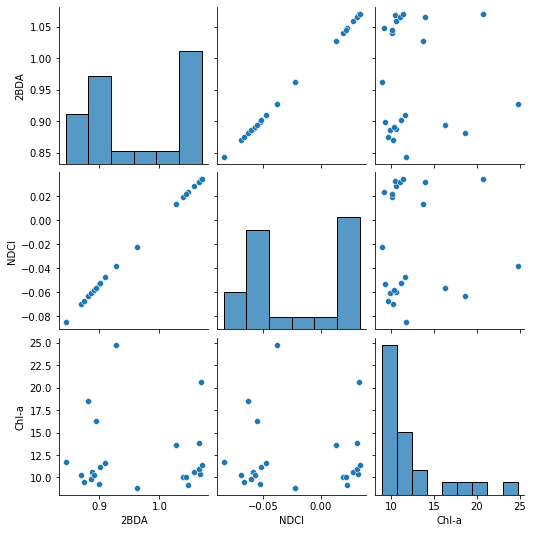

In [26]:
# Scatter plot for each variable in our dataset against another variable
sns.pairplot(Data2[list])

In [27]:
# Extract independent variables (X) & dependent variable (Y)
X = Data2[X_columns]
X = add_constant(X)
Y = Data2['Chl-a']

# Split X and Y into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create a Linear Regression model object
regression_model = OLS(Y_train,X_train)
result = OLS(Y_train,X_train).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Chl-a   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1.364
Date:                Wed, 02 Mar 2022   Prob (F-statistic):              0.290
Time:                        15:52:17   Log-Likelihood:                -43.466
No. Observations:                  16   AIC:                             92.93
Df Residuals:                      13   BIC:                             95.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1311.7266    895.331      1.465      0.1

C:\Users\SarShel\anaconda3\envs\geostats_env\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [28]:
# Get predictions
Y_predict = result.predict(X_test)
print('predicted Y:', Y_predict)

predicted Y: 101    14.543658
89      6.680851
33     14.579575
69     11.246519
98      8.455614
87     11.970701
58     10.303594
dtype: float64


In [29]:
import math

# Calculate the mean squared error
model_mse = mean_squared_error(Y_test, Y_predict)

# Calculate the mean absolute error
model_mae = mean_absolute_error(Y_test, Y_predict)

# Calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# Display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 21.9
MAE 3.46
RMSE 4.68
